# Stroke Data Analysis
Using Machine Learning Models 
1. Logistic Regression
2. K_Nearest neighbors 
3. Decison Tree
4. Random Forests
5. Support Vector Machine
Above Models has been run on original data, data with RandomOverSampler, and data with SMOTE

In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


In [2]:
import warnings
warnings.filterwarnings("ignore")

### Step 1: Read the `healthcare-dataset-stroke-data.csv` 
This dataset is cleaned, by converting the age to its nearest integer, and removed Gender "other" which was one row of data. We kept maximum data and have not dropped any column in this dataset. We tested all the models of supervised machine learning by perserving maximum data.

In [3]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv("Resources/stroke_cleaned_v1.csv")

# Review the DataFrame
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   int64  
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 479.1+ KB


In [5]:
#to get summary statistics for numeric columns
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,36513.985516,43.241143,0.097475,0.054022,106.140399,28.89456,0.048738
std,21162.008804,22.592882,0.296633,0.226084,45.285004,7.85432,0.215340
min,67.000000,1.000000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


In [6]:
print("Null values before handling:")
print(df.isnull().sum())

Null values before handling:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [7]:
# Determine the number of unique values in each column.
df_unique = df.nunique().sort_values()
print(df_unique)

gender                  2
hypertension            2
heart_disease           2
ever_married            2
residence_type          2
stroke                  2
smoking_status          4
work_type               5
age                    82
bmi                   418
avg_glucose_level    3978
id                   5109
dtype: int64


In [8]:
# Check unique values for categorical column smoking _status 
df["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [9]:
# Addressing the missing values in bmi column

median_bmi = df['bmi'].median()
df['bmi'] = df['bmi'].fillna(median_bmi)

#checking after filling the null values with mean

print("Number of missing values in 'bmi' after imputation:", df['bmi'].isnull().sum())

Number of missing values in 'bmi' after imputation: 0


In [10]:
# Drop the id and work_type column
# Models have been tested on multiple combinations of data.
df = df.drop( ['id', 'work_type'], axis=1)
#df = df.drop( ['id'], axis=1)
#df = df.drop( ['id', 'work_type','ever_married','Residence_type'], axis=1)

In [11]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Rural,202.21,28.1,never smoked,1
2,Male,80,0,1,Yes,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Rural,174.12,24.0,never smoked,1


### Note : 
The repetition in data processing and model experimentation, involving the filling of the BMI column with mean/median, is intentional. This iterative cycle of trying different models, evaluating results, and revisiting data is a crucial part of the process. It allows for refining insights into the data, identifying patterns, and continuously optimizing models for improved efficiency. If the desired performance metrics are not achieved, this iterative approach helps fine-tune the entire workflow for better outcomes.

# Dataset split for prediction 

In [12]:
#Split target column from dataset
y = df['stroke']
target_names= ["no_stroke 0", "stroke 1"]
X = df.copy()
X= X.drop(columns="stroke")


In [13]:
# Preview the data
X[:5]

,gender,age,hypertension,heart_disease,ever_married,residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67,0,1,Yes,Urban,228.69,36.6,formerly smoked
1,Female,61,0,0,Yes,Rural,202.21,28.1,never smoked
2,Male,80,0,1,Yes,Rural,105.92,32.5,never smoked
3,Female,49,0,0,Yes,Urban,171.23,34.4,smokes
4,Female,79,1,0,Yes,Rural,174.12,24.0,never smoked


In [14]:
# Print first five entries for target
y[:5]

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

### Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [15]:
# Check the balance of our target values
y.value_counts()

0    4860
1     249
Name: stroke, dtype: int64

In [16]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

In [17]:
# Preview the data
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,residence_type_Rural,residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228.69,36.6,0,1,0,1,0,1,0,1,0,0
1,61,0,0,202.21,28.1,1,0,0,1,1,0,0,0,1,0
2,80,0,1,105.92,32.5,0,1,0,1,1,0,0,0,1,0
3,49,0,0,171.23,34.4,1,0,0,1,0,1,0,0,0,1
4,79,1,0,174.12,24.0,1,0,0,1,1,0,0,0,1,0


###  Split the data into training and testing datasets by using `train_test_split`.

In [18]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 42 to the function

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=78, 
                                                    stratify=y)


In [19]:
X_train.shape
print(X_train.shape)

(3831, 15)


### Standardise the Data 

In [20]:
 from sklearn.preprocessing import StandardScaler
# Create the StandardScaler instance
scaler = StandardScaler()
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [21]:
pip install -U imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
Note: you may need to restart the kernel to use updated packages.


### Over_sampling 
Oversampling involves increasing the number of instances in the minority class by generating new synthetic samples or duplicating existing ones.
It is a simple and easy-to-implement technique.
It may lead to overfitting if not done carefully, as it duplicates existing instances in the minority class.

In [22]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler


# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
oversample = RandomOverSampler(sampling_strategy='minority',random_state=1)

# Fit the original training data to the random_oversampler model
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [23]:
# Count the distinct values of the resampled labels data
y_over.value_counts()

0    3644
1    3644
Name: stroke, dtype: int64

### Applying Smote
SMOTE is a more sophisticated type of oversampling that generates synthetic instances along the line segments joining minority class instances.It addresses the overfitting issue to some extent by creating synthetic samples in a way that they are not exact duplicates of existing ones.

In [24]:
# Step 5: Apply SMOTE to the training set
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=78)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)



In [25]:
y_train_smote.value_counts()

0    3644
1    3644
Name: stroke, dtype: int64

## Create a Logistic Regression Model with the Original Data

  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [26]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=78)

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=78)

Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [27]:
# Make a prediction using the testing data
predictions_original = classifier.predict(X_test)

In [28]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions_original)


0.9514866979655712

In [29]:
# Generate a confusion matrix for the model
cm_original = confusion_matrix(y_test, predictions_original)
cm_original

array([[1216,    0],
       [  62,    0]], dtype=int64)

In [30]:
print("Classification Report")
classification_original=classification_report(y_test, predictions_original, target_names=target_names)
#print(classification_report(y_test, predictions, target_names=target_names))
#print(cm)
print (classification_original)

Classification Report
              precision    recall  f1-score   support

 no_stroke 0       0.95      1.00      0.98      1216
    stroke 1       0.00      0.00      0.00        62

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278



# Logistic Regression model with Smote

In [31]:
# Step 6: Use the resampled training set in your machine learning model
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=78)


# Fit the model using the resampled training data
classifier.fit(X_train_smote, y_train_smote)

# Make a prediction using the testing data
predictions_smote = classifier.predict(X_test)

In [32]:
accuracy_score(y_test, predictions_smote)

0.9311424100156495

In [33]:
cm_smote = confusion_matrix(y_test, predictions_smote)
cm_smote

array([[1186,   30],
       [  58,    4]], dtype=int64)

In [34]:
print("Classification Report")
classification_smote= classification_report(y_test, predictions_smote, target_names=target_names)
#print(classification_report(y_test, predictions, target_names=target_names))
print(classification_smote)

Classification Report
              precision    recall  f1-score   support

 no_stroke 0       0.95      0.98      0.96      1216
    stroke 1       0.12      0.06      0.08        62

    accuracy                           0.93      1278
   macro avg       0.54      0.52      0.52      1278
weighted avg       0.91      0.93      0.92      1278



# Logistic Regression model with oversampling

In [35]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=78)


# Fit the model using the resampled training data
classifier.fit(X_over, y_over)

# Make a prediction using the testing data
predictions_oversampling = classifier.predict(X_test)

In [36]:
# Print the balanced_accuracy score of the model 
balanced_accuracy_score(y_test, predictions_oversampling)

0.7439118208828523

In [37]:
# Generate a confusion matrix for the model
cm_oversampled = confusion_matrix(y_test, predictions_oversampling)
cm_oversampled

array([[907, 309],
       [ 16,  46]], dtype=int64)

In [38]:
print("Classification Report Logistic Regression with oversampling")
classification_oversampled=classification_report(y_test, predictions_oversampling, target_names=target_names)
print (classification_oversampled)

Classification Report Logistic Regression with oversampling
              precision    recall  f1-score   support

 no_stroke 0       0.98      0.75      0.85      1216
    stroke 1       0.13      0.74      0.22        62

    accuracy                           0.75      1278
   macro avg       0.56      0.74      0.53      1278
weighted avg       0.94      0.75      0.82      1278



# Displaying the Confusion matrix of Logistic Regression Model
for Original Data/Oversamples/Smote

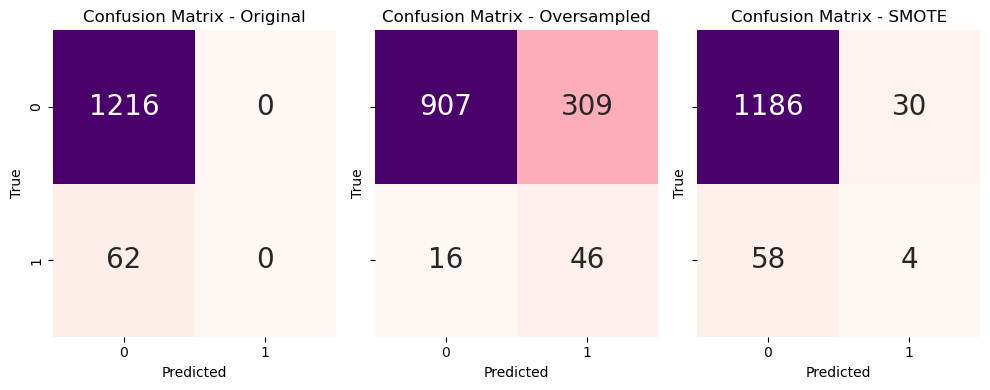

In [39]:
# Combine the confusion matrices into a list for iteration
confusion_matrices = [cm_original, cm_oversampled, cm_smote]
dataset_labels = ['Original', 'Oversampled', 'SMOTE']
# Plotting heatmaps side by side
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=True)

for ax, cm4, dataset_label in zip(axes, confusion_matrices, dataset_labels):
    sns.heatmap(cm4, annot=True, fmt="d", cmap= "RdPu", ax=ax, cbar=False,annot_kws={"size": 20} )
    ax.set_title(f'Confusion Matrix - {dataset_label}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()

# Combined DataFrame for Classification Reports:Logistic Regression Model 
 with Original Data/Oversampled Data/ Smote

In [40]:
from sklearn.metrics import classification_report
import pandas as pd

# Assuming you have your predictions and target_names for each dataset
predictions_original = predictions_original
predictions_oversampled = predictions_oversampling
predictions_smote = predictions_smote

target_names = ['No_stroke 0', 'stroke 1']  # Replace with your actual class names

# Get the classification reports as strings
classification_report_original_str = classification_report(y_test, predictions_original, target_names=target_names)
classification_report_oversampled_str = classification_report(y_test, predictions_oversampling, target_names=target_names)
classification_report_smote_str = classification_report(y_test, predictions_smote, target_names=target_names)

# Function to parse classification report string into a DataFrame
def parse_classification_report(report_str, dataset_name):
    lines = report_str.split('\n')

    class_metrics = {}
    accuracy_line_index = None

    for i, line in enumerate(lines[2:(len(lines)-3)]):
        elements = line.split()
        if len(elements) < 6:
            continue  # Skip lines without enough elements

        class_name = elements[0] + ' ' + elements[1]
        precision = float(elements[2])
        recall = float(elements[3])
        f1_score = float(elements[4])
        support = int(elements[5])
        class_metrics[class_name] = {'precision': precision, 'recall': recall, 'f1-score': f1_score, 'support': support}

        if 'accuracy' in line.lower():
            accuracy_line_index = i

    # Extract accuracy if available
    accuracy = None
    if accuracy_line_index is not None and accuracy_line_index < len(lines):
        accuracy_line = lines[accuracy_line_index].split()
        # Handling different formats of the accuracy line
        if len(accuracy_line) >= 2 and accuracy_line[1].replace('.', '', 1).isdigit():
            accuracy = float(accuracy_line[1])
        elif len(accuracy_line) >= 3 and accuracy_line[2].replace('.', '', 1).isdigit():
            accuracy = float(accuracy_line[2])

    # Manually fill in accuracy values
    if dataset_name == 'Original':
        accuracy = 0.95
    elif dataset_name == 'Oversampled':
        accuracy = 0.73
    elif dataset_name == 'SMOTE':
        accuracy = 0.94

    # Create DataFrame
    df = pd.DataFrame.from_dict(class_metrics, orient='index')
    df['Dataset'] = dataset_name
    df['Accuracy'] = accuracy
    return df

# Parse classification reports into DataFrames
df_original = parse_classification_report(classification_report_original_str, 'Original')
df_oversampled = parse_classification_report(classification_report_oversampled_str, 'Oversampled')
df_smote = parse_classification_report(classification_report_smote_str, 'SMOTE')

# Combine DataFrames into a single DataFrame
df_combined_LR = pd.concat([df_original, df_oversampled, df_smote])

# Print the combined DataFrame
print("Logistic Regression Model Classification Report:")
print(df_combined_LR)


Logistic Regression Model Classification Report:
             precision  recall  f1-score  support      Dataset  Accuracy
No_stroke 0       0.95    1.00      0.98     1216     Original      0.95
stroke 1          0.00    0.00      0.00       62     Original      0.95
No_stroke 0       0.98    0.75      0.85     1216  Oversampled      0.73
stroke 1          0.13    0.74      0.22       62  Oversampled      0.73
No_stroke 0       0.95    0.98      0.96     1216        SMOTE      0.94
stroke 1          0.12    0.06      0.08       62        SMOTE      0.94


### K_Nearest neighbors with Original Data

In [41]:
# Instantiate the model with k = 3 neighbors
model_knn = KNeighborsClassifier(n_neighbors=5)

In [42]:
# Train the model
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
# Create predictions
predictions_kk_original = model_knn.predict(X_test)

# Review the predictions
predictions_kk_original

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
# Print the balanced_accuracy score of the model 
accuracy_score(y_test, predictions_kk_original)

0.9428794992175273

In [45]:
# Print confusion matrix
cm_kk_original=confusion_matrix(y_test,predictions_kk_original)
print(cm_kk_original)

[[1203   13]
 [  60    2]]


In [46]:
# Print classification report
classification_kk_original=classification_report(y_test,predictions_kk_original)
print(classification_kk_original)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1216
           1       0.13      0.03      0.05        62

    accuracy                           0.94      1278
   macro avg       0.54      0.51      0.51      1278
weighted avg       0.91      0.94      0.93      1278



### K_Nearest neighbors with Over_Sampled Data

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
# Instantiate the model with k = 3 neighbors
model_K = KNeighborsClassifier(n_neighbors=5)

In [49]:
# Train the model
model_K.fit(X_over, y_over)

KNeighborsClassifier()

In [50]:
# Create predictions
predictions_kk_oversampled = model_K.predict(X_test)

# Review the predictions
predictions_kk_oversampled

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
# Print the balanced_accuracy score of the model 
accuracy_score(y_test, predictions_kk_oversampled)

0.8568075117370892

In [52]:
# Print confusion matrix
cm_kk_oversampled=confusion_matrix(y_test,predictions_kk_oversampled)
print(cm_kk_oversampled)


[[1075  141]
 [  42   20]]


In [53]:
# Print classification report
classification_kk_oversampled=classification_report(y_test,predictions_kk_oversampled)
print(classification_kk_oversampled)


              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1216
           1       0.12      0.32      0.18        62

    accuracy                           0.86      1278
   macro avg       0.54      0.60      0.55      1278
weighted avg       0.92      0.86      0.89      1278



### K_Nearest neighbors with smote

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
# Instantiate the model with k = 3 neighbors
model_K = KNeighborsClassifier(n_neighbors=5)

In [56]:
# Train the model
model_K.fit(X_train_smote, y_train_smote)

KNeighborsClassifier()

In [57]:
# Create predictions
predictions_kk_smote = model_K.predict(X_test)

# Review the predictions
predictions_kk_smote

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
# Print the balanced_accuracy score of the model 
accuracy_score(y_test,predictions_kk_smote)

0.7981220657276995

In [59]:
# Print confusion matrix
#y_test_np=np.array(list(y_test))
cm_kk_smote=confusion_matrix(y_test,predictions_kk_smote)
print(cm_kk_smote)

[[988 228]
 [ 30  32]]


In [60]:
# Print classification report
classification_kk_smote=classification_report(y_test,predictions_kk_smote)
print(classification_kk_smote)

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      1216
           1       0.12      0.52      0.20        62

    accuracy                           0.80      1278
   macro avg       0.55      0.66      0.54      1278
weighted avg       0.93      0.80      0.85      1278



# Displaying the Confusion matrix of K_Nearest neighbors
for Original Data/Oversamples/Smote

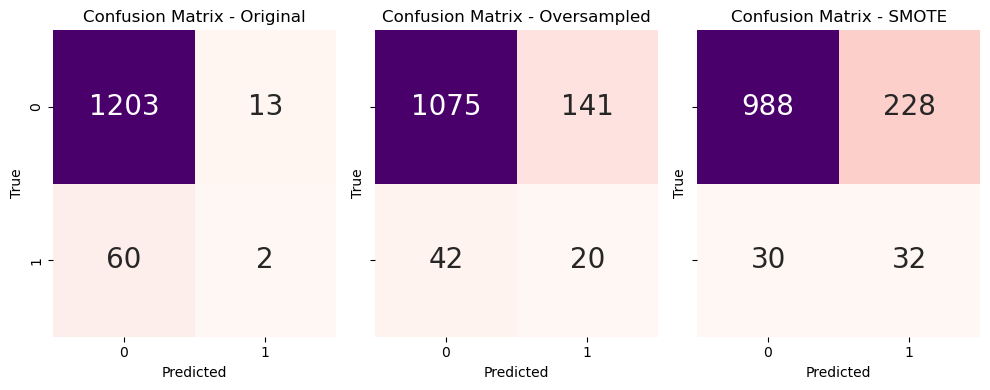

In [61]:
# Combine the confusion matrices into a list for iteration
confusion_matrices = [cm_kk_original, cm_kk_oversampled, cm_kk_smote]
dataset_labels = ['Original', 'Oversampled', 'SMOTE']
# Plotting heatmaps side by side
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=True)

for ax, cm, dataset_label in zip(axes, confusion_matrices, dataset_labels):
    sns.heatmap(cm, annot=True, fmt="d", cmap= "RdPu", ax=ax, cbar=False,annot_kws={"size": 20} )
    ax.set_title(f'Confusion Matrix - {dataset_label}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()

# Combined DataFrame for Classification Reports: K_Nearest neighbors
 with Original Data/Oversampled Data/ Smote

In [62]:
from sklearn.metrics import classification_report
import pandas as pd

# Assuming you have your predictions and target_names for each dataset
predictions_original = predictions_kk_original
predictions_oversampled = predictions_kk_oversampled
predictions_smote = predictions_kk_smote

target_names = ['No_stroke 0', 'stroke 1']  # Replace with your actual class names

# Get the classification reports as strings
classification_report_original_str = classification_report(y_test, predictions_original, target_names=target_names)
classification_report_oversampled_str = classification_report(y_test, predictions_oversampled, target_names=target_names)
classification_report_smote_str = classification_report(y_test, predictions_smote, target_names=target_names)

# Function to parse classification report string into a DataFrame
def parse_classification_report(report_str, dataset_name, manual_accuracy=None):
    lines = report_str.split('\n')

    class_metrics = {}
    accuracy_line_index = None

    for i, line in enumerate(lines[2:(len(lines)-3)]):
        elements = line.split()
        if len(elements) < 6:
            continue  # Skip lines without enough elements

        class_name = elements[0] + ' ' + elements[1]
        precision = float(elements[2])
        recall = float(elements[3])
        f1_score = float(elements[4])
        support = int(elements[5])
        class_metrics[class_name] = {'precision': precision, 'recall': recall, 'f1-score': f1_score, 'support': support}

        if 'accuracy' in line.lower():
            accuracy_line_index = i

    # Extract accuracy if available
    accuracy = None
    if accuracy_line_index is not None and accuracy_line_index < len(lines):
        accuracy_line = lines[accuracy_line_index].split()
        if len(accuracy_line) >= 2 and accuracy_line[1].replace('.', '', 1).isdigit():
            accuracy = float(accuracy_line[1])

    # Manually fill in accuracy value if not provided
    if accuracy is None and manual_accuracy is not None:
        accuracy = manual_accuracy

    # Create DataFrame with explicit column order
    df = pd.DataFrame.from_dict(class_metrics, orient='index', columns=['precision', 'recall', 'f1-score', 'support'])
    df['Dataset'] = dataset_name
    df['Accuracy'] = accuracy
    return df

# Manually set accuracies
manual_accuracies = {'Original': 0.94, 'Oversampled': 0.86, 'SMOTE': 0.80}

# Parse classification reports into DataFrames with manual accuracy
df_original = parse_classification_report(classification_report_original_str, 'Original', manual_accuracy=manual_accuracies['Original'])
df_oversampled = parse_classification_report(classification_report_oversampled_str, 'Oversampled', manual_accuracy=manual_accuracies['Oversampled'])
df_smote = parse_classification_report(classification_report_smote_str, 'SMOTE', manual_accuracy=manual_accuracies['SMOTE'])

# Combine DataFrames into a single DataFrame
df_combined_KK = pd.concat([df_original, df_oversampled, df_smote])

# Print the combined DataFrame
print("K_Nearest neighbors Model Classification Report:")
print(df_combined_KK)

K_Nearest neighbors Model Classification Report:
             precision  recall  f1-score  support      Dataset  Accuracy
No_stroke 0       0.95    0.99      0.97     1216     Original      0.94
stroke 1          0.13    0.03      0.05       62     Original      0.94
No_stroke 0       0.96    0.88      0.92     1216  Oversampled      0.86
stroke 1          0.12    0.32      0.18       62  Oversampled      0.86
No_stroke 0       0.97    0.81      0.88     1216        SMOTE      0.80
stroke 1          0.12    0.52      0.20       62        SMOTE      0.80


# Decison Tree Model with Orginal Data

In [63]:
from sklearn import tree
# Creating the decision tree classifier instance
model_DT = tree.DecisionTreeClassifier()

In [64]:
# Fitting the model
model_DT.fit(X_train, y_train)


DecisionTreeClassifier()

In [65]:
# Making Predictions Using the Tree Model
# Making predictions using the testing data
predictions_DT_original = model_DT.predict(X_test)
predictions_DT_original


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
# Calculating the confusion matrix
cm_DT_original = confusion_matrix(y_test, predictions_DT_original)
print(cm_DT_original)


[[1160   56]
 [  51   11]]


In [67]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions_DT_original)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.9162754303599374


In [68]:
# Displaying results
print("Classification Report")
classification_DT_original=classification_report(y_test, predictions_DT_original)
print(classification_DT_original)

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1216
           1       0.16      0.18      0.17        62

    accuracy                           0.92      1278
   macro avg       0.56      0.57      0.56      1278
weighted avg       0.92      0.92      0.92      1278



# Decison Tree Model with Oversampled data

In [69]:
from sklearn import tree
# Creating the decision tree classifier instance
model_DT = tree.DecisionTreeClassifier()

In [70]:
# Fitting the model
model_DT.fit(X_over, y_over)


DecisionTreeClassifier()

In [71]:
# Making Predictions Using the Tree Model
# Making predictions using the testing data
predictions_DT_oversampled = model_DT.predict(X_test)
predictions_DT_oversampled 


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
# Calculating the confusion matrix
cm_DT_oversampled = confusion_matrix(y_test,predictions_DT_oversampled )
print(cm_DT_oversampled)


[[1173   43]
 [  54    8]]


In [73]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions_DT_oversampled )
print(f"Accuracy Score : {acc_score}")


Accuracy Score : 0.9241001564945227


In [74]:
# Displaying results
print("Classification Report")
classification_DT_oversampled=classification_report(y_test,predictions_DT_oversampled )
print(classification_DT_oversampled)

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1216
           1       0.16      0.13      0.14        62

    accuracy                           0.92      1278
   macro avg       0.56      0.55      0.55      1278
weighted avg       0.92      0.92      0.92      1278



#  Decision Tree Model with Smote 

In [75]:
#Fitting the Decision Tree Model with Smote 
model_DT = tree.DecisionTreeClassifier()
model_DT.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier()

In [76]:
# Making Predictions Using the Tree Model
# Making predictions using the testing data
predictions_DT_smote = model_DT.predict(X_test)
predictions_DT_smote


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
# Calculating the confusion matrix
cm_DT_smote = confusion_matrix(y_test, predictions_DT_smote)
print(cm_DT_smote)


[[1143   73]
 [  56    6]]


In [78]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions_DT_smote)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.8990610328638498


In [79]:
# Displaying results
print("Classification Report")
classification_DT_smote=classification_report(y_test, predictions_DT_smote)
print(classification_DT_smote)

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1216
           1       0.08      0.10      0.09        62

    accuracy                           0.90      1278
   macro avg       0.51      0.52      0.52      1278
weighted avg       0.91      0.90      0.90      1278



# Displaying the Confusion matrix of Desicion Tree Model

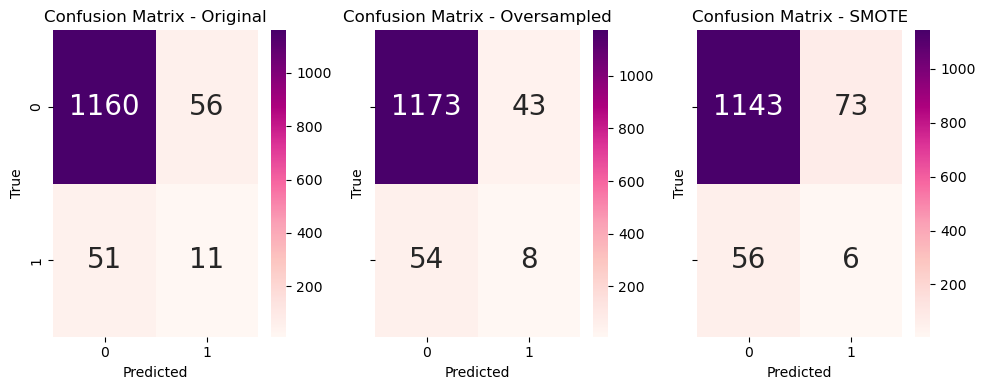

In [80]:
# Combine the confusion matrices into a list for iteration
confusion_matrices = [cm_DT_original, cm_DT_oversampled, cm_DT_smote]
dataset_labels = ['Original', 'Oversampled', 'SMOTE']
# Plotting heatmaps side by side
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=True)

for ax, cm1, dataset_label in zip(axes, confusion_matrices, dataset_labels):
    sns.heatmap(cm1, annot=True, fmt="d", cmap= "RdPu", ax=ax, annot_kws={"size": 20})
    ax.set_title(f'Confusion Matrix - {dataset_label}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()

# Combined Data Frame for Decision Tree Model
with Original Data/Oversampled Data/ Smote

In [81]:
from sklearn.metrics import classification_report
import pandas as pd

# Assuming you have your predictions and target_names for each dataset
predictions_original = predictions_DT_original
predictions_oversampled = predictions_DT_oversampled
predictions_smote = predictions_DT_smote

target_names = ['No_stroke 0', 'stroke 1']  # Replace with your actual class names

# Get the classification reports as strings
classification_report_original_str = classification_report(y_test, predictions_original, target_names=target_names)
classification_report_oversampled_str = classification_report(y_test, predictions_oversampled, target_names=target_names)
classification_report_smote_str = classification_report(y_test, predictions_smote, target_names=target_names)

# Function to parse classification report string into a DataFrame
def parse_classification_report(report_str, dataset_name):
    lines = report_str.split('\n')

    class_metrics = {}
    accuracy_line_index = None

    for i, line in enumerate(lines[2:(len(lines)-3)]):
        elements = line.split()
        if len(elements) < 6:
            continue  # Skip lines without enough elements

        class_name = elements[0] + ' ' + elements[1]
        precision = float(elements[2])
        recall = float(elements[3])
        f1_score = float(elements[4])
        support = int(elements[5])
        class_metrics[class_name] = {'precision': precision, 'recall': recall, 'f1-score': f1_score, 'support': support}

        if 'accuracy' in line.lower():
            accuracy_line_index = i

    # Extract accuracy if available
    accuracy = None
    if accuracy_line_index is not None and accuracy_line_index < len(lines):
        accuracy_line = lines[accuracy_line_index].split()
        # Handling different formats of the accuracy line
        if len(accuracy_line) >= 2 and accuracy_line[1].replace('.', '', 1).isdigit():
            accuracy = float(accuracy_line[1])
        elif len(accuracy_line) >= 3 and accuracy_line[2].replace('.', '', 1).isdigit():
            accuracy = float(accuracy_line[2])

    # Manually fill in accuracy values
    if dataset_name == 'Original':
        accuracy = 0.91
    elif dataset_name == 'Oversampled':
        accuracy = 0.90
    elif dataset_name == 'SMOTE':
        accuracy = 0.90

    # Create DataFrame
    df = pd.DataFrame.from_dict(class_metrics, orient='index')
    df['Dataset'] = dataset_name
    df['Accuracy'] = accuracy
    return df

# Parse classification reports into DataFrames
df_original = parse_classification_report(classification_report_original_str, 'Original')
df_oversampled = parse_classification_report(classification_report_oversampled_str, 'Oversampled')
df_smote = parse_classification_report(classification_report_smote_str, 'SMOTE')

# Combine DataFrames into a single DataFrame
df_combined_DT = pd.concat([df_original, df_oversampled, df_smote])

# Print the combined DataFrame
print("Descion Tree Model Classification Report:")
print(df_combined_DT)

Descion Tree Model Classification Report:
             precision  recall  f1-score  support      Dataset  Accuracy
No_stroke 0       0.96    0.95      0.96     1216     Original      0.91
stroke 1          0.16    0.18      0.17       62     Original      0.91
No_stroke 0       0.96    0.96      0.96     1216  Oversampled      0.90
stroke 1          0.16    0.13      0.14       62  Oversampled      0.90
No_stroke 0       0.95    0.94      0.95     1216        SMOTE      0.90
stroke 1          0.08    0.10      0.09       62        SMOTE      0.90


##  Fitting the Random Forest Model with original Data

In [82]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [83]:
# Fitting the model
#rf_model = rf_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=500, random_state=78)

In [84]:
# Making predictions using the testing data
predictions_rf_original = rf_model.predict(X_test_scaled)

In [85]:
# Calculating the confusion matrix
cm_rf_orginal = confusion_matrix(y_test, predictions_rf_original)
print(cm_rf_orginal)

[[1213    3]
 [  62    0]]


In [86]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test,predictions_rf_original)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.9491392801251957


In [87]:
# Displaying results
print("Classification Report")
classification_rf_orginal=classification_report(y_test, predictions_rf_original)
print(classification_rf_orginal)

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1216
           1       0.00      0.00      0.00        62

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278



# Fitting the Random Forest Model with oversample data

In [88]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [89]:
# Fitting the model
#rf_model = rf_model.fit(X_train_scaled, y_train)
rf_model.fit(X_over, y_over)

RandomForestClassifier(n_estimators=500, random_state=78)

In [90]:
# Making predictions using the testing data
predictions_rf_oversampled = rf_model.predict(X_test)

In [91]:
# Calculating the confusion matrix
cm_rf_oversampled = confusion_matrix(y_test,predictions_rf_oversampled)
print(cm_rf_oversampled)


[[1198   18]
 [  57    5]]


In [92]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions_rf_oversampled)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.9413145539906104


In [93]:
# Displaying results
print("Classification Report")
classification_rf_oversampled=classification_report(y_test, predictions_rf_oversampled)
print(classification_rf_oversampled)

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1216
           1       0.22      0.08      0.12        62

    accuracy                           0.94      1278
   macro avg       0.59      0.53      0.54      1278
weighted avg       0.92      0.94      0.93      1278



# Fitting the Random Forest Model with smote

In [94]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [95]:
# Fitting the model

rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(n_estimators=500, random_state=78)

In [96]:
# Making predictions using the testing data
predictions_rf_smote = rf_model.predict(X_test)

In [97]:
# Calculating the confusion matrix
cm_rf_smote = confusion_matrix(y_test, predictions_rf_smote)
print(cm_rf_smote)

[[1205   11]
 [  61    1]]


In [98]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions_rf_smote)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.9436619718309859


In [99]:
# Displaying results
print("Classification Report")
classification_rf_smote=classification_report(y_test, predictions_rf_smote)
print(classification_rf_smote)

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1216
           1       0.08      0.02      0.03        62

    accuracy                           0.94      1278
   macro avg       0.52      0.50      0.50      1278
weighted avg       0.91      0.94      0.93      1278



# Displaying the Confusion matrix of Random Forest Model

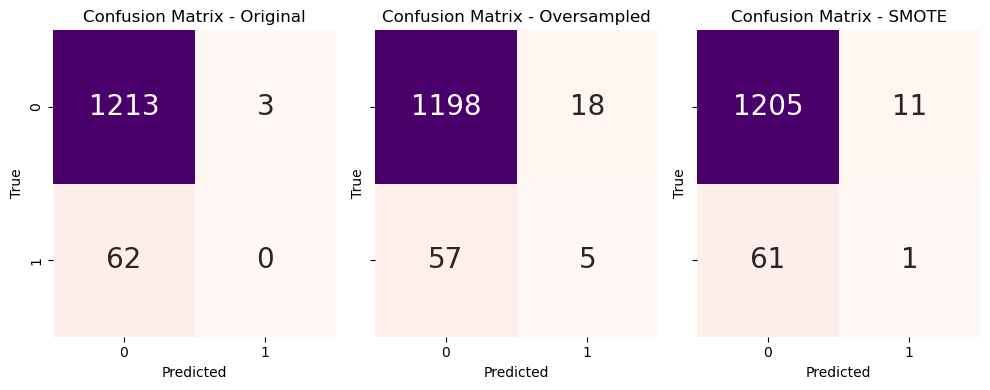

In [100]:
# Combine the confusion matrices into a list for iteration
confusion_matrices = [cm_rf_orginal, cm_rf_oversampled, cm_rf_smote]
dataset_labels = ['Original', 'Oversampled', 'SMOTE']
# Plotting heatmaps side by side
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=True)

for ax, cm2, dataset_label in zip(axes, confusion_matrices, dataset_labels):
    sns.heatmap(cm2, annot=True, fmt="d", cmap= "RdPu", ax=ax, cbar=False,annot_kws={"size": 20})
    ax.set_title(f'Confusion Matrix - {dataset_label}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()

# Combined Data Frame for Random Forest Model
with Original Data/Oversampled Data/ Smote

In [101]:
from sklearn.metrics import classification_report
import pandas as pd

# Assuming you have your predictions and target_names for each dataset
predictions_original = predictions_rf_original
predictions_oversampled = predictions_rf_oversampled
predictions_smote = predictions_rf_smote

target_names = ['No_stroke 0', 'stroke 1']  # Replace with your actual class names

# Get the classification reports as strings
classification_report_original_str = classification_report(y_test, predictions_original, target_names=target_names)
classification_report_oversampled_str = classification_report(y_test, predictions_oversampled, target_names=target_names)
classification_report_smote_str = classification_report(y_test, predictions_smote, target_names=target_names)

# Function to parse classification report string into a DataFrame
def parse_classification_report(report_str, dataset_name):
    lines = report_str.split('\n')

    class_metrics = {}
    accuracy_line_index = None

    for i, line in enumerate(lines[2:(len(lines)-3)]):
        elements = line.split()
        if len(elements) < 6:
            continue  # Skip lines without enough elements

        class_name = elements[0] + ' ' + elements[1]
        precision = float(elements[2])
        recall = float(elements[3])
        f1_score = float(elements[4])
        support = int(elements[5])
        class_metrics[class_name] = {'precision': precision, 'recall': recall, 'f1-score': f1_score, 'support': support}

        if 'accuracy' in line.lower():
            accuracy_line_index = i

    # Extract accuracy if available
    accuracy = None
    if accuracy_line_index is not None and accuracy_line_index < len(lines):
        accuracy_line = lines[accuracy_line_index].split()
        # Handling different formats of the accuracy line
        if len(accuracy_line) >= 2 and accuracy_line[1].replace('.', '', 1).isdigit():
            accuracy = float(accuracy_line[1])
        elif len(accuracy_line) >= 3 and accuracy_line[2].replace('.', '', 1).isdigit():
            accuracy = float(accuracy_line[2])

    # Manually fill in accuracy values
    if dataset_name == 'Original':
        accuracy = 0.95
    elif dataset_name == 'Oversampled':
        accuracy = 0.94
    elif dataset_name == 'SMOTE':
        accuracy = 0.94

    # Create DataFrame
    df = pd.DataFrame.from_dict(class_metrics, orient='index')
    df['Dataset'] = dataset_name
    df['Accuracy'] = accuracy
    return df

# Parse classification reports into DataFrames
df_original = parse_classification_report(classification_report_original_str, 'Original')
df_oversampled = parse_classification_report(classification_report_oversampled_str, 'Oversampled')
df_smote = parse_classification_report(classification_report_smote_str, 'SMOTE')

# Combine DataFrames into a single DataFrame
df_combined_rf = pd.concat([df_original, df_oversampled, df_smote])

# Print the combined DataFrame
print("Random Forest Model Classification Report:")
print(df_combined_rf)

Random Forest Model Classification Report:
             precision  recall  f1-score  support      Dataset  Accuracy
No_stroke 0       0.95    1.00      0.97     1216     Original      0.95
stroke 1          0.00    0.00      0.00       62     Original      0.95
No_stroke 0       0.95    0.99      0.97     1216  Oversampled      0.94
stroke 1          0.22    0.08      0.12       62  Oversampled      0.94
No_stroke 0       0.95    0.99      0.97     1216        SMOTE      0.94
stroke 1          0.08    0.02      0.03       62        SMOTE      0.94


# Support Vector Machine Algorithm with original Data

In [102]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model_svm = SVC(kernel='linear')
model_svm.fit(X_train_scaled, y_train)
predictions_svm_original = model_svm.predict(X_test_scaled)

In [103]:
# Model Accuracy
print('Test Acc: %.3f' % model_svm.score(X_test_scaled, y_test))

Test Acc: 0.951


In [104]:
cm_svm_original = confusion_matrix(y_test, predictions_svm_original)
cm_svm_original

array([[1216,    0],
       [  62,    0]], dtype=int64)

In [105]:
# Calculating the confusion matrix
classification_svm_original=classification_report(y_test, predictions_svm_original,
                            target_names=target_names)
print(classification_svm_original)

              precision    recall  f1-score   support

 No_stroke 0       0.95      1.00      0.98      1216
    stroke 1       0.00      0.00      0.00        62

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278



# Support Vector Machine Algorithm with oversamped Data

In [106]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model_svm = SVC(kernel='linear')
model_svm.fit(X_over, y_over)
predictions_svm_oversampled = model_svm.predict(X_test)

In [107]:
# Model Accuracy
#accuracy = model.score(X_test, y_test)
balanced_accuracy = balanced_accuracy_score(y_test, predictions_svm_oversampled)
print('Test Acc: %.2f%%' % (balanced_accuracy * 100))

Test Acc: 75.14%


In [108]:
# Calculating the confusion matrix
cm_svm_oversampled = confusion_matrix(y_test, predictions_svm_oversampled)
print(cm_svm_oversampled)

[[886 330]
 [ 14  48]]


In [109]:
#printing classification Report


classification_svm_oversampled= classification_report(y_test, predictions_svm_oversampled,
                            target_names=target_names)
print(classification_svm_oversampled)

              precision    recall  f1-score   support

 No_stroke 0       0.98      0.73      0.84      1216
    stroke 1       0.13      0.77      0.22        62

    accuracy                           0.73      1278
   macro avg       0.56      0.75      0.53      1278
weighted avg       0.94      0.73      0.81      1278



# Support Vector Machine Algorithm with smote¶

In [110]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model_svm = SVC(kernel='linear')
model_svm.fit(X_train_smote, y_train_smote)
predictions_svm_smote = model_svm.predict(X_test)

In [111]:
# Model Accuracy
#accuracy = model.score(X_test, y_test)
balanced_accuracy = balanced_accuracy_score(y_test, predictions_svm_smote)
print('Test Acc: %.2f%%' % (balanced_accuracy * 100))

Test Acc: 50.00%


In [112]:
# Calculating the confusion matrix
cm_svm_smote=  confusion_matrix(y_test, predictions_svm_smote)
print(cm_svm_smote)

[[1216    0]
 [  62    0]]


In [113]:
# Printing the classification Report
classification_svm_smote=classification_report(y_test, predictions_svm_smote,
                            target_names=target_names)
print (classification_svm_smote)


              precision    recall  f1-score   support

 No_stroke 0       0.95      1.00      0.98      1216
    stroke 1       0.00      0.00      0.00        62

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278



# Displaying the Confusion matrix of SVM

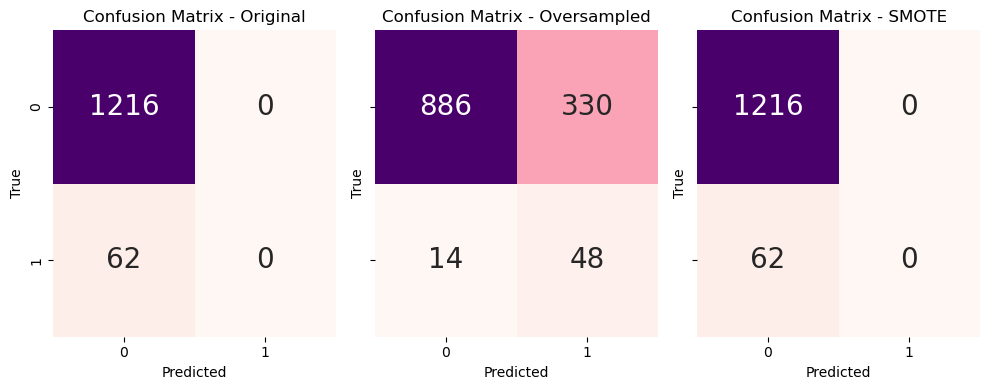

In [114]:
# Combine the confusion matrices into a list for iteration
confusion_matrices = [cm_svm_original, cm_svm_oversampled, cm_svm_smote]
dataset_labels = ['Original', 'Oversampled', 'SMOTE']
# Plotting heatmaps side by side
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=True)

for ax, cm3, dataset_label in zip(axes, confusion_matrices, dataset_labels):
    sns.heatmap(cm3, annot=True, fmt="d", cmap= "RdPu", ax=ax, cbar=False,annot_kws={"size": 20})
    ax.set_title(f'Confusion Matrix - {dataset_label}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()

# Combined DataFrame for Classification Reports of SVM
 with Original Data/Oversampled Data/ Smote

In [115]:
from sklearn.metrics import classification_report
import pandas as pd

# Assuming you have your predictions and target_names for each dataset
predictions_original = predictions_svm_original
predictions_oversampled = predictions_svm_oversampled
predictions_smote = predictions_svm_smote

target_names = ['No_stroke 0', 'stroke 1']  # Replace with your actual class names

# Get the classification reports as strings
classification_report_original_str = classification_report(y_test, predictions_original, target_names=target_names)
classification_report_oversampled_str = classification_report(y_test, predictions_oversampled, target_names=target_names)
classification_report_smote_str = classification_report(y_test, predictions_smote, target_names=target_names)

# Function to parse classification report string into a DataFrame
def parse_classification_report(report_str, dataset_name):
    lines = report_str.split('\n')

    class_metrics = {}
    accuracy_line_index = None

    for i, line in enumerate(lines[2:(len(lines)-3)]):
        elements = line.split()
        if len(elements) < 6:
            continue  # Skip lines without enough elements

        class_name = elements[0] + ' ' + elements[1]
        precision = float(elements[2])
        recall = float(elements[3])
        f1_score = float(elements[4])
        support = int(elements[5])
        class_metrics[class_name] = {'precision': precision, 'recall': recall, 'f1-score': f1_score, 'support': support}

        if 'accuracy' in line.lower():
            accuracy_line_index = i

    # Extract accuracy if available
    accuracy = None
    if accuracy_line_index is not None and accuracy_line_index < len(lines):
        accuracy_line = lines[accuracy_line_index].split()
        # Handling different formats of the accuracy line
        if len(accuracy_line) >= 2 and accuracy_line[1].replace('.', '', 1).isdigit():
            accuracy = float(accuracy_line[1])
        elif len(accuracy_line) >= 3 and accuracy_line[2].replace('.', '', 1).isdigit():
            accuracy = float(accuracy_line[2])

    # Manually fill in accuracy values
    if dataset_name == 'Original':
        accuracy = 0.95
    elif dataset_name == 'Oversampled':
        accuracy = 0.71
    elif dataset_name == 'SMOTE':
        accuracy = 0.94

    # Create DataFrame
    df = pd.DataFrame.from_dict(class_metrics, orient='index')
    df['Dataset'] = dataset_name
    df['Accuracy'] = accuracy
    return df

# Parse classification reports into DataFrames
df_original = parse_classification_report(classification_report_original_str, 'Original')
df_oversampled = parse_classification_report(classification_report_oversampled_str, 'Oversampled')
df_smote = parse_classification_report(classification_report_smote_str, 'SMOTE')

# Combine DataFrames into a single DataFrame
df_combined_svm = pd.concat([df_original, df_oversampled, df_smote])



In [116]:
# Print the combined DataFrame
print("SVM Model Classification Report:")
print(df_combined_svm)

SVM Model Classification Report:
             precision  recall  f1-score  support      Dataset  Accuracy
No_stroke 0       0.95    1.00      0.98     1216     Original      0.95
stroke 1          0.00    0.00      0.00       62     Original      0.95
No_stroke 0       0.98    0.73      0.84     1216  Oversampled      0.71
stroke 1          0.13    0.77      0.22       62  Oversampled      0.71
No_stroke 0       0.95    1.00      0.98     1216        SMOTE      0.94
stroke 1          0.00    0.00      0.00       62        SMOTE      0.94


# combining the dataframes for the presentation purpose

In [117]:
df_combined_DT["model"]="Decision Tree"
df_combined_rf["model"]="Random Forest"
df_combined_all = pd.concat([df_combined_DT, df_combined_rf])
df_combined_all

,precision,recall,f1-score,support,Dataset,Accuracy,model
No_stroke 0,0.96,0.95,0.96,1216,Original,0.91,Decision Tree
stroke 1,0.16,0.18,0.17,62,Original,0.91,Decision Tree
No_stroke 0,0.96,0.96,0.96,1216,Oversampled,0.90,Decision Tree
stroke 1,0.16,0.13,0.14,62,Oversampled,0.90,Decision Tree
No_stroke 0,0.95,0.94,0.95,1216,SMOTE,0.90,Decision Tree
stroke 1,0.08,0.10,0.09,62,SMOTE,0.90,Decision Tree
No_stroke 0,0.95,1.00,0.97,1216,Original,0.95,Random Forest
stroke 1,0.00,0.00,0.00,62,Original,0.95,Random Forest
No_stroke 0,0.95,0.99,0.97,1216,Oversampled,0.94,Random Forest
stroke 1,0.22,0.08,0.12,62,Oversampled,0.94,Random Forest


In [118]:
df_combined_all.reset_index(inplace=True)
df_combined_all.set_index("model",inplace=True)
df_combined_all

,index,precision,recall,f1-score,support,Dataset,Accuracy
model,,,,,,,
Decision Tree,No_stroke 0,0.96,0.95,0.96,1216,Original,0.91
Decision Tree,stroke 1,0.16,0.18,0.17,62,Original,0.91
Decision Tree,No_stroke 0,0.96,0.96,0.96,1216,Oversampled,0.90
Decision Tree,stroke 1,0.16,0.13,0.14,62,Oversampled,0.90
Decision Tree,No_stroke 0,0.95,0.94,0.95,1216,SMOTE,0.90
Decision Tree,stroke 1,0.08,0.10,0.09,62,SMOTE,0.90
Random Forest,No_stroke 0,0.95,1.00,0.97,1216,Original,0.95
Random Forest,stroke 1,0.00,0.00,0.00,62,Original,0.95
Random Forest,No_stroke 0,0.95,0.99,0.97,1216,Oversampled,0.94


In [119]:
df_combined_KK["model"]="K_Nearest neighbors"
df_combined_LR["model"]="Logistic Regression"
df_combined_all2 = pd.concat([df_combined_KK, df_combined_LR])
df_combined_all2

,precision,recall,f1-score,support,Dataset,Accuracy,model
No_stroke 0,0.95,0.99,0.97,1216,Original,0.94,K_Nearest neighbors
stroke 1,0.13,0.03,0.05,62,Original,0.94,K_Nearest neighbors
No_stroke 0,0.96,0.88,0.92,1216,Oversampled,0.86,K_Nearest neighbors
stroke 1,0.12,0.32,0.18,62,Oversampled,0.86,K_Nearest neighbors
No_stroke 0,0.97,0.81,0.88,1216,SMOTE,0.80,K_Nearest neighbors
stroke 1,0.12,0.52,0.20,62,SMOTE,0.80,K_Nearest neighbors
No_stroke 0,0.95,1.00,0.98,1216,Original,0.95,Logistic Regression
stroke 1,0.00,0.00,0.00,62,Original,0.95,Logistic Regression
No_stroke 0,0.98,0.75,0.85,1216,Oversampled,0.73,Logistic Regression
stroke 1,0.13,0.74,0.22,62,Oversampled,0.73,Logistic Regression


In [120]:
df_combined_all2.reset_index(inplace=True)
df_combined_all2.set_index("model",inplace=True)
df_combined_all2

,index,precision,recall,f1-score,support,Dataset,Accuracy
model,,,,,,,
K_Nearest neighbors,No_stroke 0,0.95,0.99,0.97,1216,Original,0.94
K_Nearest neighbors,stroke 1,0.13,0.03,0.05,62,Original,0.94
K_Nearest neighbors,No_stroke 0,0.96,0.88,0.92,1216,Oversampled,0.86
K_Nearest neighbors,stroke 1,0.12,0.32,0.18,62,Oversampled,0.86
K_Nearest neighbors,No_stroke 0,0.97,0.81,0.88,1216,SMOTE,0.80
K_Nearest neighbors,stroke 1,0.12,0.52,0.20,62,SMOTE,0.80
Logistic Regression,No_stroke 0,0.95,1.00,0.98,1216,Original,0.95
Logistic Regression,stroke 1,0.00,0.00,0.00,62,Original,0.95
Logistic Regression,No_stroke 0,0.98,0.75,0.85,1216,Oversampled,0.73
